# Introduction to Customer Segmentation in Python

## Task 6: Interactive Cluster Analysis
Let's see if there's a nicer way for us to compare our separate clusters.

In [2]:
import numpy as np
import pandas as pd

#import plotly.graph_objects as go


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [3]:
df = pd.read_csv('Data/data_with_clusters.csv', index_col=0)
data = np.load('Data/training_data.npy')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,x_kpca_poly,y_kpca_poly,x_kpca_cos,y_kpca_cos,cluster_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.052874,-0.095702,0.078374,-0.173115,0.504789,0.009622,2
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.129646,-0.160458,0.185813,-0.307415,0.889941,-0.262833,2
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.210205,0.048446,0.341702,0.075048,0.473994,0.235687,2
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.216243,0.105165,-0.253304,0.250352,-0.618611,0.370131,4
4,Retail,Other,22615,5410,7198,3915,1777,5185,-0.011687,0.265432,0.136617,0.375279,0.068900,0.861829,4


## Cluster Distribution

In [5]:
#observe if the mean value in each cluster are differnt, if the value are very differnt, then the clustering is good
df.groupby(['cluster_kpca_rbf', 'Channel', 'Region'])[features].mean()

Fresh          Milk       Grocery  \
cluster_kpca_rbf Channel Region                                             
0                HoReCa  Lisbon   5909.000000  23527.000000  13699.000000   
                         Other   10683.000000  21858.000000  15400.000000   
                 Retail  Lisbon   4999.000000  17162.428571  28280.571429   
                         Other    5515.041667  15454.666667  25002.791667   
                         Porto    5135.571429  13998.142857  20566.428571   
1                HoReCa  Lisbon   6017.600000   2914.133333   2980.533333   
                         Other    5900.634783   2549.556522   2856.382609   
                         Porto    7070.600000   1708.266667   4009.933333   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   11889.466667   4807.466667   7642.333333   
                         Porto   10708.666667   3779.666667   6193.333333   
2                HoReCa  Lisbon   5620.000000  10123.400000   9722.000000   
                         Other    3393.636364   6987.818182  10161.454545   
                 Retail  Lisbon   2995.375000   7442.250000  14304.875000   
                         Other    5919.000000   7831.600000  12074.420000   
                         Porto    2993.500000   8762.333333  11137.333333   
3                HoReCa  Lisbon  37747.142857   6045.857143   7376.142857   
                         Other   39183.750000   6478.281250   6470.281250   
                         Porto   32717.000000  16784.000000  13626.000000   
                 Retail  Other   30796.400000  28588.500000  31077.300000   
                         Porto    8565.000000   4980.000000  67298.000000   
4                HoReCa  Lisbon  17654.125000   1528.312500   2136.500000   
                         Other   18226.980769   2625.480769   3026.769231   
                         Porto   15619.916667   1842.583333   4108.250000   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   19615.166667   5419.500000   7659.000000   
                         Porto   21952.500000   3872.500000   6766.500000   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_rbf Channel Region                                                
0                HoReCa  Lisbon  10155.000000        830.000000   3636.000000  
                         Other    3635.000000        282.000000   5120.000000  
                 Retail  Lisbon   2995.714286      13884.428571   1797.714286  
                         Other    1381.041667      11222.125000   1993.250000  
                         Porto    1338.142857      10581.857143   1114.285714  
1                HoReCa  Lisbon   1988.366667        922.000000    629.233333  
                         Other    1700.278261        598.608696    936.156522  
                         Porto    1986.000000        444.933333    775.200000  
                 Retail  Lisbon   5612.000000        788.000000   1360.000000  
                         Other    1136.733333       2761.933333   1007.200000  
                         Porto     898.666667       2860.666667    930.000000  
2                HoReCa  Lisbon   1732.600000       3729.200000   1815.400000  
                         Other    1628.090909       3728.818182   1271.363636  
                 Retail  Lisbon   1231.500000       5819.125000   2007.625000  
                         Other    1306.460000       5394.080000   1443.100000  
                         Porto     692.166667       5765.833333   1018.500000  
3                HoReCa  Lisbon   7186.714286        611.142857   2868.142857  
                         Other    9346.875000        914.062500   4325.062500  
                         Porto   60869.000000       1272.000000   5609.000000  
                 Retail  Other    2611.000000      13220.000000   4209.600000  
                         Porto     131.000000 

In [7]:
# get number of customers per cluster
df.groupby(['cluster_kpca_rbf']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,x_kpca_poly,y_kpca_poly,x_kpca_cos,y_kpca_cos
cluster_kpca_rbf,,,,,,,,,,,,,,
0,40,40,40,40,40,40,40,40,40,40,40,40,40,40
1,179,179,179,179,179,179,179,179,179,179,179,179,179,179
2,80,80,80,80,80,80,80,80,80,80,80,80,80,80
3,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,90,90,90,90,90,90,90,90,90,90,90,90,90,90


In [8]:
clusters = df.cluster_kpca_rbf

In [9]:
df_normalized = df.copy(deep=True)
# df_normalized.loc[:, features] = data
df_normalized[features] /= df[features].max()

In [10]:
df_normalized.max()

Channel               Retail
Region                 Porto
Fresh                      1
Milk                       1
Grocery                    1
Frozen                     1
Detergents_Paper           1
Delicatessen               1
x_kpca_rbf           0.86213
y_kpca_rbf          0.822088
x_kpca_poly         0.815626
y_kpca_poly         0.745111
x_kpca_cos           1.16591
y_kpca_cos           1.14398
cluster_kpca_rbf           4
dtype: object

In [13]:
# get the biggest cluster and its number of contents
biggest_cluster = df.groupby(['cluster_kpca_rbf']).count().max().max()
biggest_cluster

179

82
87
177
51
43


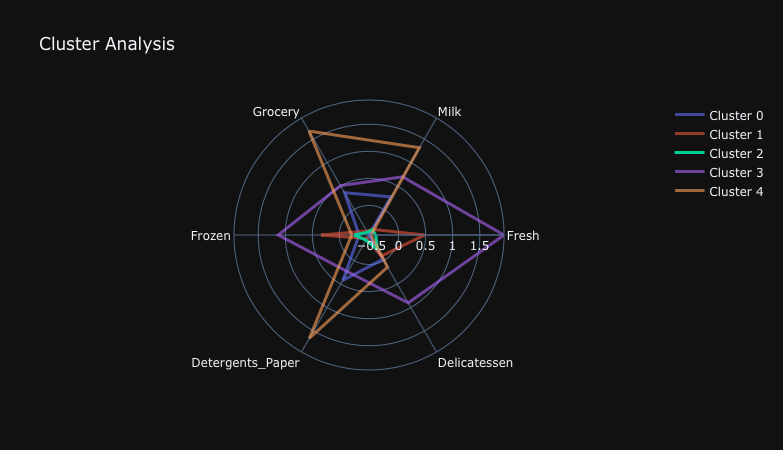

In [16]:
fig = go.Figure()

for cluster in np.unique(clusters):
    
    radii = df_normalized.loc[df_normalized.cluster_kpca_rbf==cluster, features].mean().tolist()
    thetas = features
    
    actual_values = df.loc[df.cluster_kpca_cos==cluster, features].mean().tolist()
    cluster_size = len(df[df.cluster_kpca_cos==cluster])
    print(cluster_size)
    fig.add_trace(
        go.Scatterpolar(
            r=radii + radii[:1],
            theta=thetas + thetas[:1],
            mode='lines',
            name='Cluster: '+str(cluster),
            text = [format'Mean value: {x}' for x in actual_values + actual_values[:1]],
            line=dict(width=3),
            opacity=np.max([cluster_size/biggest_cluster, 0.6])
        )
    )

fig.update_layout(
    title='Cluster Analysis',
    showlegend=True,
    template='plotly_dark',
    width=800,
    autosize=False
)

fig.show()

In [15]:
fig.write_html('Demo.html')

In [23]:
import plotly
plotly.__version__

'4.12.0'